- Name : Bhavansh Gupta
- Roll No : BECOA134
- Assignment : 1
- Title : K-Means Clustering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans

In [3]:
## Create Dataset
X = [[0.1,0.6],[0.15,0.71],[0.08,0.9],[0.16,0.85],[0.2,0.3],[0.25,0.5],[0.24,0.1],[0.3,0.2]]
df = np.array(X)
df

array([[0.1 , 0.6 ],
       [0.15, 0.71],
       [0.08, 0.9 ],
       [0.16, 0.85],
       [0.2 , 0.3 ],
       [0.25, 0.5 ],
       [0.24, 0.1 ],
       [0.3 , 0.2 ]])

In [5]:
centroids = np.array([[0.1,0.6],[0.25,0.5]])
centroids

array([[0.1 , 0.6 ],
       [0.25, 0.5 ]])

array([0.6 , 0.71, 0.9 , 0.85, 0.3 , 0.5 , 0.1 , 0.2 ])

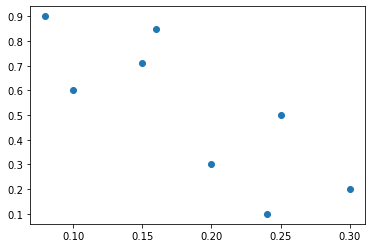

In [13]:
# Data Points
plt.figure()
plt.scatter(df[:,0],df[:,1])
plt.show()

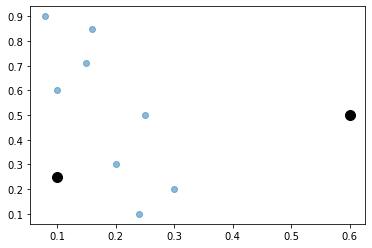

In [19]:
# Data Points with two clusters centroids
plt.figure()
plt.scatter(df[:,0],df[:,1],alpha = 0.5)
plt.scatter(centroids[0],centroids[1],color = 'black', marker='o', s=100)
plt.show()

In [21]:
model = KMeans(n_clusters=2, init=centroids, n_init=1, random_state=0)
model.fit(df)

KMeans(init=array([[0.1 , 0.6 ],
       [0.25, 0.5 ]]), n_clusters=2, n_init=1,
       random_state=0)

In [22]:
model.labels_

array([0, 0, 0, 0, 1, 1, 1, 1])

In [24]:
print("Point P6 belongs to cluster", model.labels_[5])
print("Population of cluster 2:", sum(model.labels_==1))

Point P6 belongs to cluster 1
Population of cluster 2: 4


In [25]:
print("Initial value of cluster centroids m1 & m2:")
print("m1 = ", centroids[0])
print("m2 = ", centroids[1])

print("Updated value of cluster centroids m1 & m2:")
print("m1 = ", model.cluster_centers_[0])
print("m2 = ", model.cluster_centers_[1])


Initial value of cluster centroids m1 & m2:
m1 =  [0.1 0.6]
m2 =  [0.25 0.5 ]
Updated value of cluster centroids m1 & m2:
m1 =  [0.1225 0.765 ]
m2 =  [0.2475 0.275 ]


- Using Iris Dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [27]:
dataset = load_iris()
X = dataset.data
y = dataset.target

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


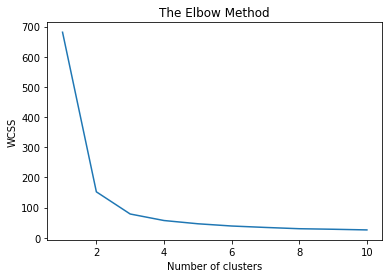

In [28]:
# Finding the optimum number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kemans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmenas = kemans.fit_predict(X)

In [43]:
dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Text(0, 0.5, 'Sepal Width')

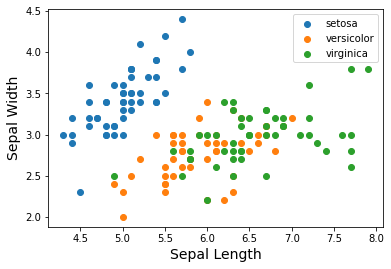

In [48]:
# Before Prediction

n_classes=len(dataset.target_names)
for i in range(n_classes):
    index = np.where(y == i)
    plt.scatter(X[index, 0], X[index, 1],  
    label=dataset.target_names[i])
plt.legend()
plt.xlabel("Sepal Length", fontsize=14)
plt.ylabel("Sepal Width", fontsize=14)

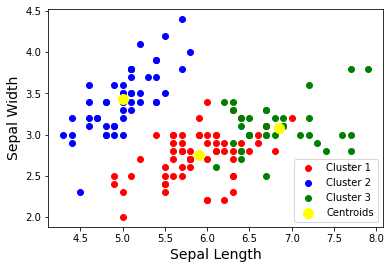

In [50]:
# After Prediction

plt.scatter(X[y_kmenas == 0, 0], X[y_kmenas == 0, 1], c='red', label='Cluster 1')
plt.scatter(X[y_kmenas == 1, 0], X[y_kmenas == 1, 1], c='blue', label='Cluster 2')
plt.scatter(X[y_kmenas == 2, 0], X[y_kmenas == 2, 1], c='green', label='Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kemans.cluster_centers_[:, 0], kemans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel("Sepal Length", fontsize=14)
plt.ylabel("Sepal Width", fontsize=14)
plt.legend()